<a href="https://colab.research.google.com/github/barkhahbpp/tweetdisasterbert/blob/main/bert_disaster_tweet_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Installing Dependencies #

Install paket dependensi / library yang digunakan untuk NLP Tweet Disaster

In [1]:
!pip install tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 23.8 MB/s eta 0:00:00


# 2. Dataset #

Link Dataset :

https://github.com/barkhahbpp/tweetdisasterbert.git

Sumber Dataset :

https://www.kaggle.com/datasets/vstepanenko/disaster-tweets

https://www.kaggle.com/datasets/vbmokin/nlp-with-disaster-tweets-cleaning-data

**Data Descripstion**

|Field name|Description|
|--- |--- |
|id	|A unique identifier for each tweet |
|keyword	|A particular keyword from the tweet |
|location	|The location the tweet was sent from (may be blank) |
|text| The text of the tweet|
|target| Denotes whether a tweet is about a real disaster (1) or not (0)|

## 2.1. Data Loading ##

In [2]:
import numpy as np
import pandas as pd

In [8]:
dataseturl = "https://raw.githubusercontent.com/barkhahbpp/tweetdisasterbert/main/dataset/tweets.csv"
twdisaster_df = pd.read_csv(dataseturl)
twdisaster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB


## 2.2. Explanatory Data Analysis ##

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
twdisaster_df.head(5)

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [13]:
twdisaster_df.groupby('target').describe()

id                                                           \
         count         mean          std  min      25%     50%      75%   
target                                                                    
0       9256.0  5631.622191  3247.050923  4.0  2853.75  5635.5  8404.50   
1       2114.0  5916.021760  3423.980548  0.0  2714.50  5930.0  9131.75   

                 
            max  
target           
0       11368.0  
1       11369.0

In [45]:
twdisaster = len(twdisaster_df.loc[twdisaster_df['target']==1])
twnotdisaster = len(twdisaster_df.loc[twdisaster_df['target']==0])


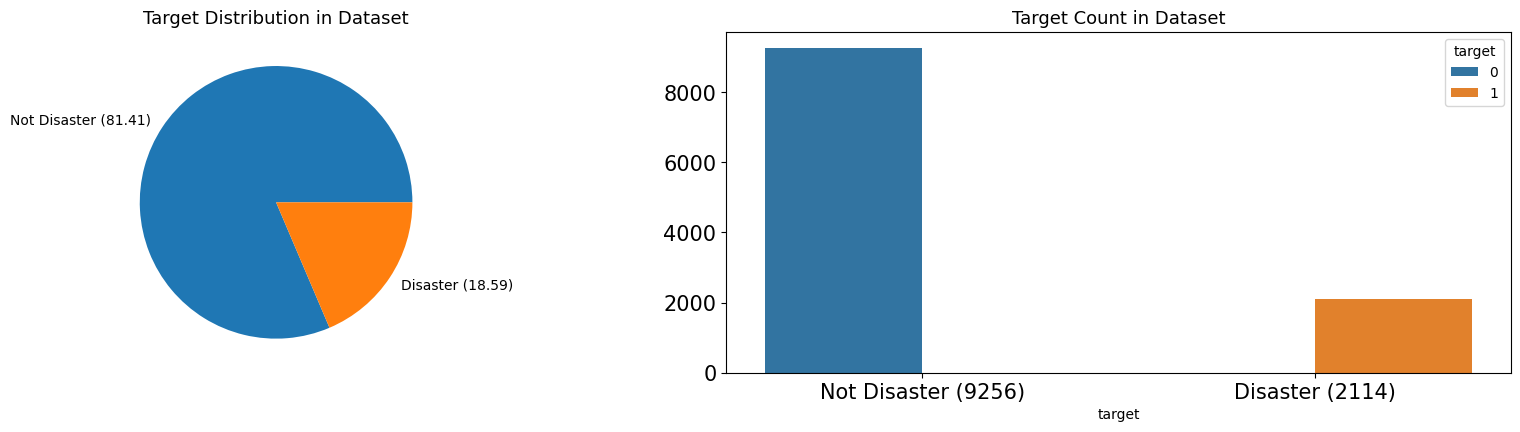

In [59]:
prop_disaster = twdisaster / len(twdisaster_df) * 100
prop_notdisaster = twnotdisaster / len(twdisaster_df) * 100

fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
plt.tight_layout()

twdisaster_df.groupby('target').count()['id'].plot(kind='pie', ax=axes[0], labels=['Not Disaster ('+'{:.2f}'.format(prop_notdisaster)+')', 'Disaster ('+'{:.2f}'.format(prop_disaster)+')'])
sns.countplot(x=twdisaster_df['target'], hue=twdisaster_df['target'], ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Not Disaster ('+str(twnotdisaster)+')', 'Disaster ('+str(twdisaster)+')'])
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Target Distribution in Dataset', fontsize=13)
axes[1].set_title('Target Count in Dataset', fontsize=13)

plt.show()
